### Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#### Loading Data

In [4]:
dataset = pd.read_csv("seed.txt", sep="\t",
                        names=["feature1", "feature2", "feature3", "feature4", "feature5", "feature6", "feature7", "class"],
                        usecols = ['feature3','feature7', "class"],
                        )
# dataset.drop(dataset["class"]==3)
dataset.drop(dataset[dataset['class'] == 3].index, inplace = True)
dataset["feature3"] = (dataset["feature3"] - dataset["feature3"].mean()) / dataset["feature3"].std()    
dataset["feature7"] = (dataset["feature7"] - dataset["feature7"].mean()) / dataset["feature7"].std()    
dataset


,feature3,feature7,class
0,-0.679414,-0.624484,1
1,-0.043658,-1.118225,1
2,1.460756,-1.363225,1
3,0.862767,-1.400630,1
4,1.360042,-0.708644,1
...,...,...,...
135,1.083079,-0.214903,2
136,-0.207318,0.780060,2
137,-1.831329,0.607999,2
138,-1.497715,0.370480,2


### Modeling

In [5]:
class LinearRegression:
    def __init__(self, data, test_data, iteration, alpha):
        self.weights = np.random.randn(3,1)
        self.X_test = test_data.to_numpy()[:,:2]
        self.X_test = np.c_[self.X_test, np.ones(self.X_test.shape[0])]
        self.y_test = test_data.to_numpy()[:,2] - 1
        self.X = data.to_numpy()[:,:2]
        self.X = np.c_[self.X, np.ones(self.X.shape[0])]
        self.y = data.to_numpy()[:,2] - 1
        self.cost_list = [0 for i in range(iteration+1)]
        self.iteration = iteration
        self.alpha = alpha
        self.test_cost_list = [0 for i in range(iteration+1)]
        
    def hypothesis(self, X):
        return 1 / (1+np.e**(-np.dot(self.weights.T,X)))

    def cost(self):
        m, n = self.X.shape
        total_error = 0
        for i in range(m):
            predicted_value = self.hypothesis(self.X[i])
            likelihood = (self.y[i]*np.log(predicted_value)) + (1-self.y[i]) * np.log(1-predicted_value)
            total_error += likelihood
        return total_error

    def test_cost(self):
        m, n = self.X_test.shape
        total_error = 0
        for i in range(m):
            predicted_value = self.hypothesis(self.X_test[i])
            loss = (self.y_test[i]*np.log(predicted_value)) + (1-self.y_test[i]) * np.log(1-predicted_value)
            total_error += loss
        return total_error

    def gradient_calc(self):
        m, n = self.X.shape
        weights_gradient = np.zeros(self.weights.shape)
        
        for i in range(n):
            for j in range(m):
                weights_gradient[i] += (self.y[j] - self.hypothesis(self.X[j])) * self.X[j, i]
        return weights_gradient
    
    def train(self):
        m, n = self.X.shape
        iteration = 0
        while iteration <= self.iteration:
            weights_gradient = self.gradient_calc()
            for i in range(n):
                self.weights[i] = self.weights[i] + self.alpha * weights_gradient[i]
            self.cost_list[iteration] = self.cost()
            self.test_cost_list[iteration] = self.test_cost()
            iteration += 1
    
    def draw_cost_function(self):
        x = [i for i in range(0, self.iteration+1, 1)]
        plt.plot(x, self.cost_list)
        plt.plot(x, self.test_cost_list)

    def accuracy_error(self):
        test_true = 0
        for i in range(len(self.X_test)):
            predict = round(self.hypothesis(self.X_test[i])[0])
            if predict == self.y_test[i]:
                test_true += 1
        train_true = 0
        for i in range(len(self.X)):
            predict = round(self.hypothesis(self.X[i])[0])
            if predict == self.y[i]:
                train_true += 1
        print ("Accuracy on test:", (test_true/self.X_test.shape[0])*100)
        print ("Accuracy on train:",(train_true/self.X.shape[0])*100)
        print ("Error on test:", (1 - test_true/self.X_test.shape[0])*100)
        print ("Error on train:",(1 - train_true/self.X.shape[0])*100)

    def draw_decision_boundary(self):
        x = np.linspace(np.min(self.X[:, 0] ), np.max(self.X[:, 0]))
        plt.plot(x, -(self.weights[0]*x + self.weights[2])/self.weights[1])
        train_colors=['red' if l==0 else 'blue' for l in self.y[:]]
        test_colors=['red' if l==0 else 'blue' for l in self.y_test[:]]
        plt.scatter(self.X[:, 0], self.X[:, 1],marker="o", label='Logistics regression', color=train_colors)
        plt.scatter(self.X_test[:, 0], self.X_test[:, 1],marker="x", label='Logistics regression', color=test_colors)
        print (f"y = - {self.weights[0]/self.weights[1]} * x + {self.weights[2]/self.weights[1]}")
        print (self.weights)           

### learning

In [8]:
train, test = dataset[:int(0.7*len(dataset))], dataset[int(0.7*len(dataset)):]

model = LinearRegression(train, test, 100, 0.004)
model.train()

### Plot the Cost (likelihood) Function.

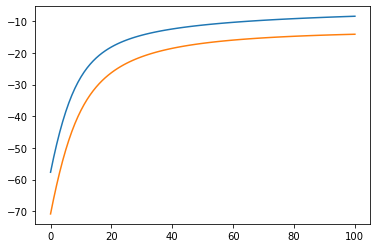

In [10]:
model.draw_cost_function()

### Accuracy on train and test

In [11]:
model.accuracy_error()

Accuracy on test: 88.09523809523809
Accuracy on train: 98.9795918367347
Error on test: 11.904761904761907
Error on train: 1.0204081632653073


### Draw The Decision Boundary

y = - [0.05268902] * x + [-0.27260992]
[[ 0.18484442]
 [ 3.50821543]
 [-0.95637432]]


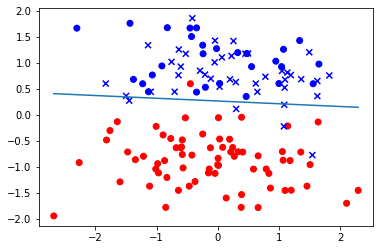

In [12]:
model.draw_decision_boundary()